# MNIST Dataset

From Wikipedia, the free encyclopedia (https://en.wikipedia.org/wiki/MNIST_database)

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23 percent. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8 percent.An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits.

THE MNIST DATABASE of handwritten digits - http://yann.lecun.com/exdb/mnist/

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-and-processing-the-dataset" data-toc-modified-id="Loading-and-processing-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading and processing the dataset</a></span><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Extract-data-and-targets" data-toc-modified-id="Extract-data-and-targets-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Extract data and targets</a></span></li><li><span><a href="#Cast-data-to-float32" data-toc-modified-id="Cast-data-to-float32-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cast data to float32</a></span></li><li><span><a href="#Add-a-dimension-to-tensor-to-become-batch_size-*-channels-*-height-*-width" data-toc-modified-id="Add-a-dimension-to-tensor-to-become-batch_size-*-channels-*-height-*-width-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Add a dimension to tensor to become batch_size * channels * height * width</a></span></li><li><span><a href="#Display-images" data-toc-modified-id="Display-images-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Display images</a></span></li></ul></li><li><span><a href="#Wrap-tensors-into-datasets" data-toc-modified-id="Wrap-tensors-into-datasets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Wrap tensors into datasets</a></span><ul class="toc-item"><li><span><a href="#Iterate-over-dataset" data-toc-modified-id="Iterate-over-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Iterate over dataset</a></span></li></ul></li><li><span><a href="#Is-the-training-dataset-balanced?" data-toc-modified-id="Is-the-training-dataset-balanced?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Is the training dataset balanced?</a></span><ul class="toc-item"><li><span><a href="#Computing-the-frequency-of-each-digit" data-toc-modified-id="Computing-the-frequency-of-each-digit-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Computing the frequency of each digit</a></span></li><li><span><a href="#Computing-the-percentages-of-each-digit-in-the-training-dataset" data-toc-modified-id="Computing-the-percentages-of-each-digit-in-the-training-dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Computing the percentages of each digit in the training dataset</a></span></li><li><span><a href="#Plotting-percentages-of-each-digit-in-a-bar-chart" data-toc-modified-id="Plotting-percentages-of-each-digit-in-a-bar-chart-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plotting percentages of each digit in a bar chart</a></span></li></ul></li></ul></div>

## Loading and processing the dataset

### Loading data

In [117]:
import torch
from torchvision import datasets, transforms

#Loading training data
train = datasets.MNIST(
    root="", #Folder where the dataset to be stored; empty means stored in current folder
    train=True, #Download the 'training' dataset, False => download 'test' dataset
    download=True, #Should be 'True' in the first time downling the dataset, else 'False'
)

#Loading test data
test = datasets.MNIST(
    root="",
    train=False,
    download=True,
)

### Extract data and targets

In [118]:
trainX, trainY = train.data, train.targets
testX,  testY  = test.data,  test.targets

print("trainX =>", "shape = ", trainX.shape, "type = ", trainX.dtype)
print("trainY =>", "shape = ", trainY.shape, "type = ", trainY.dtype)
print("testX  =>", "shape = ", testX.shape,  "type = ", testX.dtype)
print("testY  =>", "shape = ", testY.shape,  "type = ", testY.dtype)

trainX => shape =  torch.Size([60000, 28, 28]) type =  torch.uint8
trainY => shape =  torch.Size([60000]) type =  torch.int64
testX  => shape =  torch.Size([10000, 28, 28]) type =  torch.uint8
testY  => shape =  torch.Size([10000]) type =  torch.int64


### Cast data to float32

In [119]:
trainX = trainX.type(dtype=torch.float32)
testX  = testX.type(dtype=torch.float32)

print("trainX =>", "shape = ", trainX.shape, "type = ", trainX.dtype)
print("testX  =>", "shape = ", testX.shape,  "type = ", testX.dtype)

trainX => shape =  torch.Size([60000, 28, 28]) type =  torch.float32
testX  => shape =  torch.Size([10000, 28, 28]) type =  torch.float32


### Add a dimension to tensor to become batch_size * channels * height * width

In [120]:
#Returns a tensor with a dimension of size 1 inserted at specified position
trainX = torch.unsqueeze(trainX, 1) #Position here = 1 (second dimension)
testX  = torch.unsqueeze(testX, 1)
print()
print("trainX =>", "shape = ", trainX.shape, "type = ", trainX.dtype)
print("testX  =>", "shape = ", testX.shape,  "type = ", testX.dtype)


trainX => shape =  torch.Size([60000, 1, 28, 28]) type =  torch.float32
testX  => shape =  torch.Size([10000, 1, 28, 28]) type =  torch.float32


### Display images

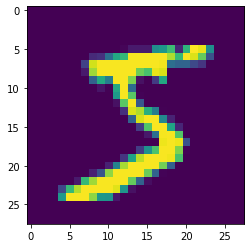

In [121]:
import matplotlib.pyplot as plt

plt.imshow(trainX[0].view(28,28))

## Wrap tensors into datasets

In [122]:
from torch.utils.data import TensorDataset

trainDS = TensorDataset(trainX, trainY)

for xDS,yDS in trainDS:
    print("xDS => ", "shape = ", xDS.shape, "type = ", xDS.dtype)
    print("yDS => ", "shape = ", yDS.shape, "type = ", yDS.dtype)
    break

xDS =>  shape =  torch.Size([1, 28, 28]) type =  torch.float32
yDS =>  shape =  torch.Size([]) type =  torch.int64


### Iterate over dataset

In [127]:
from torch.utils.data import DataLoader

trainDL = DataLoader(trainDS, batch_size=8, shuffle=True)

for xDL, yDL in trainDL:
    print("xDL => ", "shape = ", xDL.shape, "type = ", xDL.dtype)
    print("yDL => ", "shape = ", yDL.shape, "type = ", yDL.dtype)
    break

xDL =>  shape =  torch.Size([8, 1, 28, 28]) type =  torch.float32
yDL =>  shape =  torch.Size([8]) type =  torch.int64


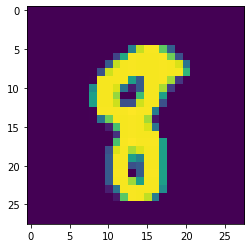

In [133]:
plt.imshow(xDL[0].view(28,28)) #Display the first image of the batch

## Is the training dataset balanced?

### Computing the frequency of each digit

In [134]:
total = 0
count_dictionary = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for Xs, ys in trainDL:
    for y in ys:
        count_dictionary[int(y)] += 1
        total += 1

print("Count of each digit => ", count_dictionary)        
print("Total number of digits in the MNIST training dataset = ", total)

Count of each digit =>  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Total number of digits in the MNIST training dataset =  60000


### Computing the percentages of each digit in the training dataset

In [137]:
percentage_dictionary = {0:0.0, 1:0.0, 2:0.0, 3:0.0, 4:0.0, 5:0.0, 6:0.0, 7:0.0, 8:0.0, 9:0.0}

for i in count_dictionary:
    percentage_dictionary[i] = count_dictionary[i]/total * 100
    
print(percentage_dictionary)

{0: 9.871666666666666, 1: 11.236666666666666, 2: 9.93, 3: 10.218333333333334, 4: 9.736666666666666, 5: 9.035, 6: 9.863333333333333, 7: 10.441666666666666, 8: 9.751666666666667, 9: 9.915000000000001}


### Plotting percentages of each digit in a bar chart

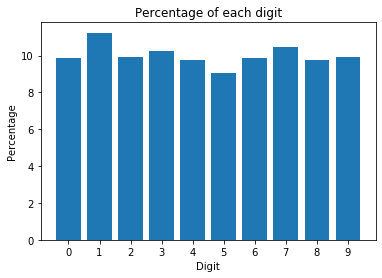

In [144]:
plt.bar(range(len(percentage_dictionary)), list(percentage_dictionary.values()), align='center')
plt.xticks(range(len(percentage_dictionary)), list(percentage_dictionary.keys()))
plt.title("Percentage of each digit")
plt.xlabel("Digit")
plt.ylabel("Percentage")
plt.show()